In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
sns.set(style="ticks") 

In [29]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


We are working with a dataset on "tips given to servers from men and women at lunch and dinner" that contains 244 observations. The goal is to find out generally who tips more and what mealtime generates bigger tips.

In [30]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The dataset has 244 observations. The average total Bill is approximately dollar 20 with total bill amount ranging from  dollar 3 to dollar 50. 
The average tip is approximately dollar 3 which range from dollar 1 to 10 dollar

Next look at summary of non-numerical fields by using frequency table.

In [32]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [33]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

Here we have data for only Thursday, Friday, Saturday and Sunday. The mealtimes are categorized as Dinner and Lunch. 

# Question 1:
Choose one variable and plot that variable four different ways.

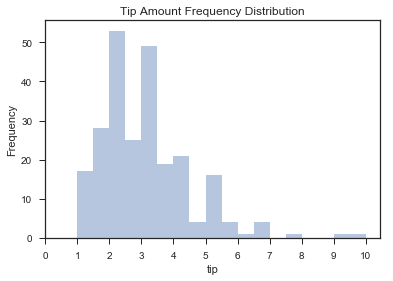

In [36]:
#Histogram without KDE
sns.distplot(tips.tip, kde=False);
plt.ylabel('Frequency')
plt.title('Tip Amount Frequency Distribution');
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.show()

This shows the distribution for tips amount. Most people paid dollar 2 to dollar 4 as tip, where few people paid dollar 1 , with very less people paying dollar 10 as tip.

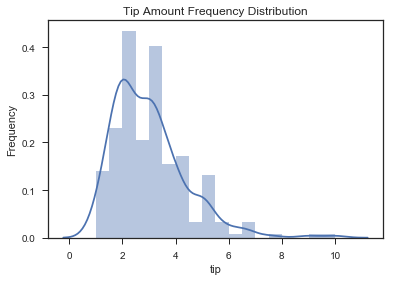

In [25]:
#Histogram with KDE
sns.distplot(tips.tip)
plt.ylabel('Frequency')
plt.title('Tip Amount Frequency Distribution');
plt.show()

This is a variation of the above plot with a kernel density estimate (KDE)

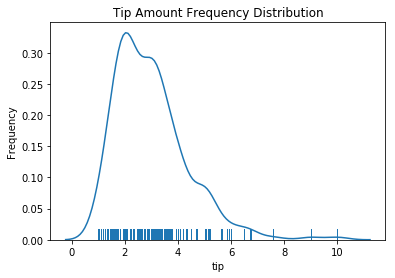

In [5]:
#density, rug, no hist
sns.distplot(tips.tip, hist=False, rug=True);
plt.ylabel('Frequency')
plt.title('Tip Amount Frequency Distribution');
plt.show()

This is a variation of the tip distribution with a kernel density estimate (KDE) and rug, without a histogram

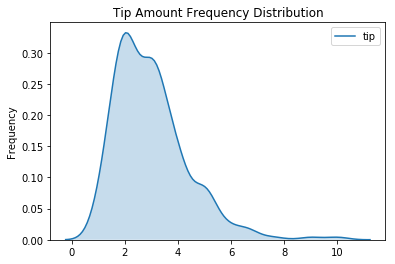

In [6]:
#kdeplot instead of distplot
sns.kdeplot(tips.tip, shade=True);
plt.ylabel('Frequency')
plt.title('Tip Amount Frequency Distribution');
plt.show()

This is a variation of the tip distribution plot.

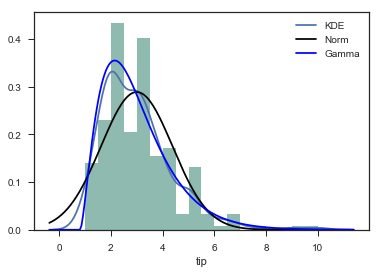

Normal Distribution: mean = 2.99827868852459, std = 1.3807999538298954 
Gamma Distribution: alpha = 2.564392072049629, loc = 0.8128216658953877, beta = 0.8522354371851788 


In [38]:
#check the underlying distribution
sns.distplot(tips.tip, kde=True, fit=stats.norm, kde_kws={"label": "KDE"}, fit_kws={"label": "Norm", "color": "k"});
#sns.distplot(tips.tip, kde=False, fit=stats.beta,  fit_kws={"label": "Beta", "color": "g"});
sns.distplot(tips.tip, kde=False, fit=stats.gamma, fit_kws={"label": "Gamma", "color": "b"});
plt.legend(loc='best')
plt.show()
m, s = stats.norm.fit(tips.tip) # get mean and standard deviation  
print('Normal Distribution: mean = {}, std = {} '.format(m,s))
alpha, loc, beta = stats.gamma.fit(tips.tip) 
print('Gamma Distribution: alpha = {}, loc = {}, beta = {} '.format(alpha, loc, beta))

The KDE for tip amount is nearing to the Gamma distiribution but not Normal distribution.

# Question 2:
Choose two continuous variables, and plot them three different ways.

Let's plot the tips and total bill (both are continuous variables) to find the relation among them along with the univariate (or marginal) distribution of tip and total bill on separate axes.

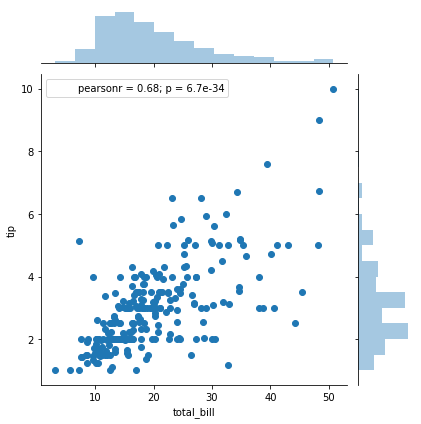

In [8]:
sns.jointplot(x="total_bill", y="tip", data=tips);
plt.show()

The Pearson correlation coefficient shows a moderate positive relationship between total bill and tip. Means The tip is increasing with a higher total bill. 
The lower P value shows that the correlation is statistically significant.

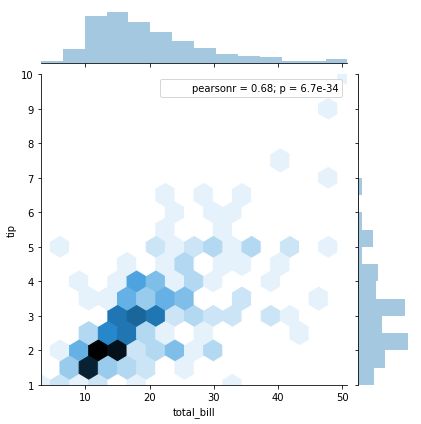

In [9]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex');
plt.show()

This shows more number of tips generated for bill ranging from dollar 10 to dollar 20 .


The Pearson correlation coefficient shows a moderate positive relationship between total bill and tip. Means The tip is increasing with a higher total bill. 
The lower P value shows that the correlation is statistically significant.

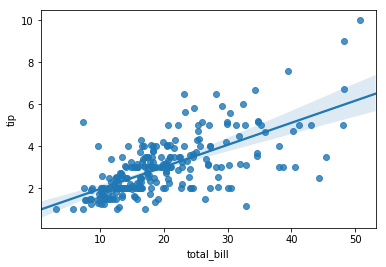

In [10]:
sns.regplot(x="total_bill", y="tip", data=tips);
plt.show()

The tip amount increases with increase in total bill.

# Question 3 : 
Choose one continuous variable and one categorical variable, and plot them six different ways.

Tip paid is the continuous variables, plotted against categorical variables( time, sex). 

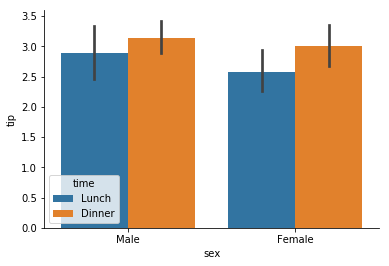

In [22]:
sns.barplot(x= 'sex', y = 'tip', data=tips,hue='time')
sns.despine()
plt.show()

As per the figure, the dinner generates higher tips than lunch and both times men tip more than women.

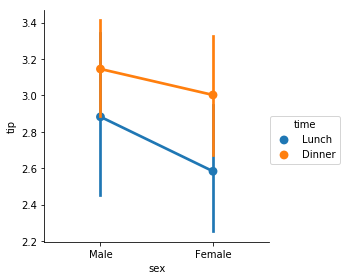

In [23]:
sns.factorplot(x="sex", y="tip", hue="time", data=tips)
plt.show()

This plot is a variation of the previous plot.
The dinner generates higher tips than lunch. and both times men tip more than women.

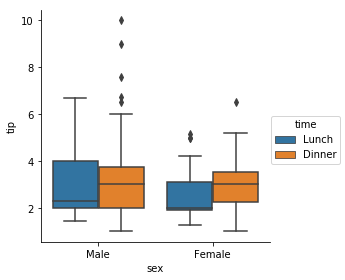

In [24]:
sns.factorplot(x= 'sex', y='tip', data= tips,hue='time' ,kind='box')
plt.show()

As per the figure, the dinner generates higher median tips than lunch and both times men tip more than women.

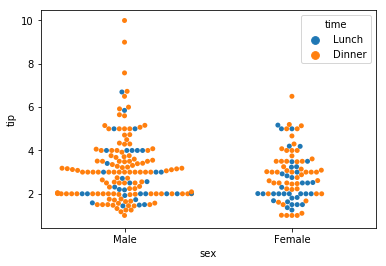

In [7]:
sns.swarmplot(x="sex", y="tip", hue="time",   data=tips);
plt.show()

This figure shows that dinner contributed more towards the tip amount than Lunch and both times men tip more than women.

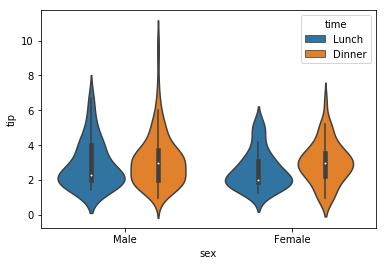

In [11]:
sns.violinplot(x="sex", y="tip", hue="time", data=tips);
plt.show()

As per the figure, the dinner generates higher tips than lunch and both times men tip more than women.

In [26]:
new_df = tips.groupby(['sex','time'])['tip'].mean()
print(new_df)

sex     time  
Male    Lunch     2.882121
        Dinner    3.144839
Female  Lunch     2.582857
        Dinner    3.002115
Name: tip, dtype: float64


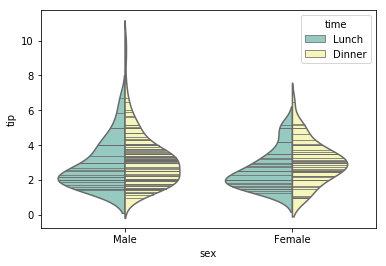

In [25]:
sns.violinplot(x="sex", y="tip", hue="time", data=tips, split=True, inner="stick", palette="Set3");
plt.show()

As per the figure, both times men tip more than women.

# Challenge

In [3]:
iris = sns.load_dataset("iris")

In [30]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [39]:
# check the informations
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [40]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The dataset has 150 rows and 5 columns.
There are 3 species of Iris flower.  They are 'setosa', 'versicolor', 'virginica'. 
The dataset has 4 continuous variables (sepal_length, sepal_width,petal_length,petal_width ) and one categorical variable  (species).

In [41]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
The average sepal_length is 5.843333 which ranges from 4.3 to 7.9.
The average sepal_width is 3.057333 which ranges from 2 to 4.4
The average petal_length is 3.758000 which ranges from 1 to 6.9
The average petal_width is 1.199333 which ranges from 0.1 to 2.5

Let's analyse the probability distribution for each of the variables

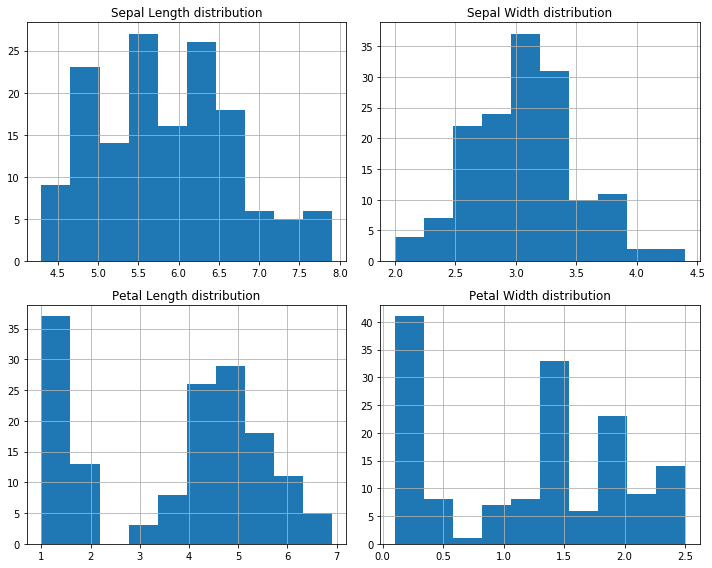

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
iris['sepal_length'].hist()
plt.title('Sepal Length distribution')
plt.subplot(2,2,2)
iris['sepal_width'].hist()
plt.title('Sepal Width distribution')
plt.subplot(2,2,3)
iris['petal_length'].hist()
plt.title('Petal Length distribution')
plt.subplot(2,2,4)
iris['petal_width'].hist()
plt.title('Petal Width distribution')
plt.tight_layout()
plt.show()


Now Let's analyse the Bivariate relationships.

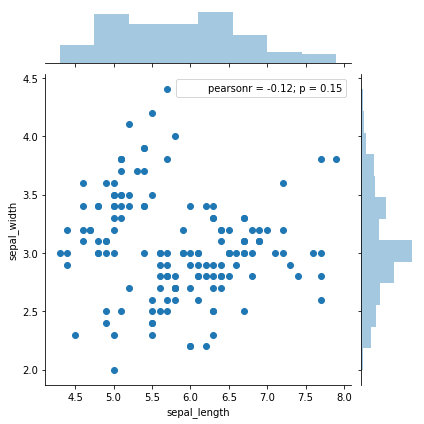

In [50]:
sns.jointplot(x= 'sepal_length' , y= 'sepal_width', data= iris)
plt.show()

Here we see a negative correlation between sepal length and sepal width.

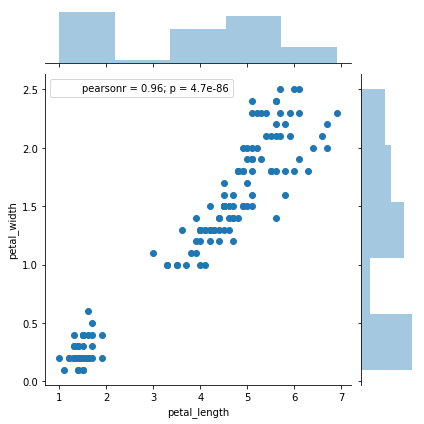

In [12]:
sns.jointplot(x= 'petal_length' , y= 'petal_width', data= iris)
plt.show()

Here we see a high positive correlation between PetalWidth and PetalLength (0.96)

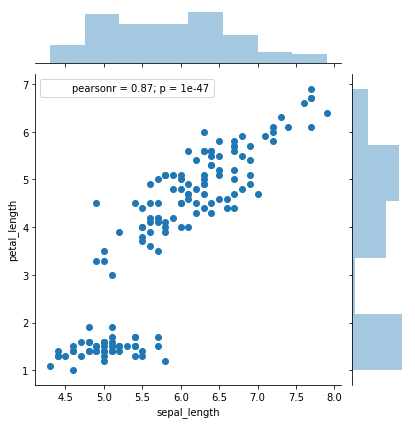

In [13]:
sns.jointplot(x= 'sepal_length' , y= 'petal_length', data= iris)
plt.show()

Here we see a high positive correlation between PetalLength and SepalLength (0.87)

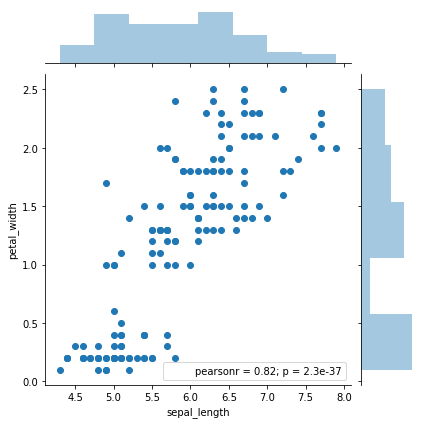

In [14]:
sns.jointplot(x= 'sepal_length' , y= 'petal_width', data= iris)
plt.show()

Here we see a high positive correlation between PetalWidth and SepalLength (0.82)

Let's analyse the variables for different species.

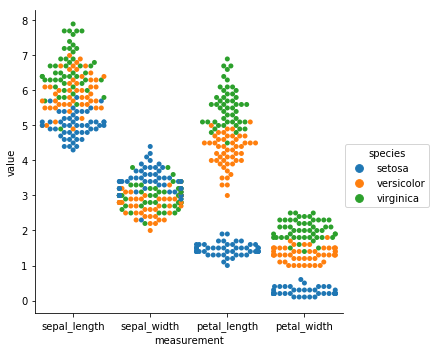

In [51]:
piris = pd.melt(iris, "species", var_name="measurement") 
sns.factorplot(x="measurement", y="value", hue="species", data=piris, size=5, kind="swarm") 
plt.show() 

When compare the sepal length:

1) The Iris-Virginica has the longest sepals compared to the other classes, 

2) The Iris-Versicolor has the medium length for sepals compared to the other classes and 

3) The Iris-Setosa has the shortest sepals compared to the other classes.

When compare the sepal width:

1) The Iris-Setosa has the widest sepals compared to the other classes, 

2) The Iris- Virginica has the medium width in comparison to the other classes and 

3) The Iris-Versicolor has the narrowest of Sepals compared to the other classes.

When compare the petal lenth:

1) The Iris-Virginica has the longest petals compared to the other classes, 

2) The Iris-Versicolor has the medium length in comparison with the other classes and

3) The Iris-Setosa has the shortest petals compared to the other classes.

When compare the petal width:

1) The Iris-Virginica has the widest petals when compared to the other classes, 

2) The Iris-Versicolor has the medium width of petals in comparison to the other classes and 

3) The Iris-Setosa has the narrowest petals when compared to the other classes.
